In [1]:
DATA_DIR = '../data/'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Отчет высылается по почте Зуеву Кириллу на адрес kir2207@list.ru

В качестве темы письма указать: «КЛ ДЗ № 1, ФИО»

Срок выполнения задания – до 24 февраля включительно

Замечания:
1. Отчет должен быть в виде текста на русском языке, объемом 1-5 страниц. Код программы присылается отдельным файлом (в комментариях следует указать язык программирования и его версию, а также использованные библиотеки и откуда они взяты).
2. Оценка задания учитывает общий объем и качество проведенной работы, включая полноту тестирования и подробность отчета об исследовании. Автоматическое тестирование обычно оценивается более высоко, чем ручное (при прочих равных).
3. За творческие и более полные решения могут быть добавлены баллы.

# Задание D

Выполнить лексико-статистический анализ двух текстов на русском языке, среднего размера:
1. текст художественной прозы, например, текста главы 2 из книги Л Кэрролла «Алиса в Стране Чудес» или главы из романа Л.Толстого или рассказа А.Чехова.
2. текст научно-технической или деловой прозы.

Для этого следует составить программу, которая с помощью выбранного морфопроцессора,
например: Диалинг-АОТ , mystem, pymorphy или CrossMorphy (ссылки см. в варианте А),
осуществляет морфологический анализ словоформ текста;
вычисляет 7-15 статистических характеристик разного типа:
- общестатистические: общее число словоупотреблений, число различных словоформ, средняя
длина предложения (если процессор разбивает текст на предложения) и т.п.;
- морфологические: абсолютная и относительная частота омонимичных словоформ, процент
разных частей речи, наиболее частотные падежи у существительных и прилагательных,
относительную частоту падежей, наиболее частотные морфологические формы глаголов
(время/лицо/число) и т.п.;
- лексические: количество уникальных лемм, число уникальных лемм разных частей речи
(существительных, глаголов и др.), число незнакомых слов, самые частотные слова и их
относительная частота, самые частотные слова основных частей речи (существительные,
прилагательные, наречия, глаголы), коэффициент лексического богатства текста (=отношение
числа различных лемм к общему числу словоупотреблений) и т.п.
выводит подсчитанные характеристики в удобной, обозримой форме.

Отчет: составленная программа, подсчитанная статистика (в удобной, обозримой форме, в
зависимости от стилей/жанров текстов), пояснения по способу ее подсчета и выводы,
программа с комментариями.

# Выкачиваем данные

## Художественный текст

In [4]:
with open(DATA_DIR+'alice_full_text.txt', 'r') as f:
    alice_txt = f.read()

In [5]:
alice_txt_by_chapter = {idx:s.strip() for idx, s in enumerate([s for s in re.split('Глава.*\n\n\n', alice_txt) if len(s)>0])}

## Научно-технический текст

"ПОСОБИЕ ПО НАПИСАНИЮ
РАЗНОГО РОДА ДЕЛОВЫХ ТЕКСТОВ"
https://www.iis.nsk.su/files/articles/sbor_kas_16_nesgovorova.pdf

In [6]:
with open(DATA_DIR+'how_to_business_text.txt','r') as f:
    how_to_buis_txt = f.read()

In [7]:
def beautify_str(s):
    s = re.sub(r'Рис\. \d+\n+', '', s)
    s = re.sub('[^\.?;\n](\n)[^\n]', ' ', s)
    return s

In [8]:
alice_txt_by_chapter = {idx:beautify_str(s) for idx,s in alice_txt_by_chapter.items()}
how_to_buis_txt = beautify_str(how_to_buis_txt)

# Ищем статистику с pymorphy и считаем метрики

In [9]:
import pymorphy2

In [10]:
morph = pymorphy2.MorphAnalyzer()

## общестатистические

### общее число словоупотреблений

In [11]:
txt = alice_txt_by_chapter[1]

In [12]:
morph.parse('страньше')

[Parse(word='страньше', tag=OpencorporaTag('COMP'), normal_form='странний', score=0.5135135135135136, methods_stack=((<DictionaryAnalyzer>, 'раньше', 2648, 27), (<UnknownPrefixAnalyzer>, 'ст'))),
 Parse(word='страньше', tag=OpencorporaTag('NOUN,anim,femn sing,datv'), normal_form='страньша', score=0.21621621621621623, methods_stack=((<FakeDictionary>, 'страньше', 167, 2), (<KnownSuffixAnalyzer>, 'ьше'))),
 Parse(word='страньше', tag=OpencorporaTag('NOUN,anim,femn sing,loct'), normal_form='страньша', score=0.21621621621621623, methods_stack=((<FakeDictionary>, 'страньше', 167, 6), (<KnownSuffixAnalyzer>, 'ьше'))),
 Parse(word='страньше', tag=OpencorporaTag('ADVB'), normal_form='страньше', score=0.05405405405405406, methods_stack=((<FakeDictionary>, 'страньше', 3, 0), (<KnownSuffixAnalyzer>, 'ьше')))]

In [13]:
morph.word_is_known('странный')

True

In [14]:
def get_n_wordsamples(txt):
    return len([x for x in re.findall(r'\w+', txt)])

In [15]:
get_n_wordsamples(alice_txt_by_chapter[1]), get_n_wordsamples(how_to_buis_txt)

(1606, 1333)

### число различных словоформ

In [16]:
def get_n_uniq_wordsamples(txt):
    return len(set([x for x in re.findall(r'\w+', txt)]))

In [17]:
get_n_uniq_wordsamples(alice_txt_by_chapter[1]), get_n_uniq_wordsamples(how_to_buis_txt)

(851, 827)

### средняя длина предложения

In [18]:
def avg_sentence_path(txt):
    return np.mean([len(re.split(r'\s', x.strip())) for x in re.findall(r'[(--)\w ,]+[\.?!]', txt)])    

In [19]:
avg_sentence_path(alice_txt_by_chapter[1]), avg_sentence_path(how_to_buis_txt)

/home/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Possible set difference at position 2
  


(8.756476683937823, 14.722222222222221)

### что-то ещё?

## морфологические

### абсолютная и относительная частота омонимичных словоформ 

?????

In [20]:
def get_wordsample_freqs(txt):
    ns = {}
    for w in re.findall(r'\w+',txt):
        nfs = morph.normal_forms(w)
        ns[nfs[0]] = ns.get(nfs[0],0)+1#int(len(nfs)>1)
    counts = np.array([x for x in ns.values()])
    #print(counts[:5])
    abs_freq = np.mean(counts/counts.sum())
    rel_freq = np.mean(counts/len(ns))
    return abs_freq, rel_freq

In [21]:
get_wordsample_freqs(alice_txt_by_chapter[1])

(0.001579778830963665, 0.004008096054546044)

In [22]:
get_wordsample_freqs(alice_txt_by_chapter[0])

(0.0015313935681470138, 0.003946914816525918)

In [23]:
get_wordsample_freqs(how_to_buis_txt)

(0.00165016501650165, 0.003629818427387293)

### процент разных частей речи

In [24]:
def get_POS_percent(txt):
    ns = {x:0 for x in list(morph.parse('')[0].tag.PARTS_OF_SPEECH)+['None']}
    for w in re.findall(r'\w+', txt):
        pos = morph.parse(w)[0].tag.POS
        pos = pos if pos is not None else 'None'        
        ns[pos] += 1
    ns = {k:v/sum(ns.values()) for k,v in ns.items()}
    return ns

In [25]:
pd.Series(get_POS_percent(alice_txt_by_chapter[1])).sort_values(ascending=False).head()

NOUN    0.203611
VERB    0.162516
CONJ    0.121420
NPRO    0.108966
PREP    0.094645
dtype: float64

In [26]:
pd.Series(get_POS_percent(alice_txt_by_chapter[0])).sort_values(ascending=False).head()

NOUN    0.203209
VERB    0.151515
CONJ    0.124183
NPRO    0.105764
PREP    0.101010
dtype: float64

In [27]:
pd.Series(get_POS_percent(how_to_buis_txt)).sort_values(ascending=False).head()

NOUN    0.401350
ADJF    0.171043
CONJ    0.098275
PREP    0.096024
VERB    0.058515
dtype: float64

### наиболее частотные падежи у существительных и прилагательных

In [29]:
def get_case_percent(txt):
    ns = {x:0 for x in list(morph.parse('')[0].tag.CASES)+['None']}
    for w in re.findall(r'\w+', txt):
        case = morph.parse(w)[0].tag.case
        case = case if case is not None else 'None'        
        ns[case] += 1
    ns = {k:v/sum(ns.values()) for k,v in ns.items()}
    return ns

In [30]:
case_verb = {'nomn':'Им','gent':'Род','datv':'Дат','accs':'Вин','ablt':'Твор','loct':'Предл','voct':'Зват','gen2':'Род2','acc2':'Вин2','loc2':'Предл2','None':'None'}

In [31]:
pd.Series(get_case_percent(alice_txt_by_chapter[0])).sort_values(ascending=False).rename(case_verb)

None      0.609031
Им        0.155080
Род       0.093880
Вин       0.051693
Дат       0.034462
Твор      0.027332
Предл     0.024361
Род2      0.001783
Предл2    0.001783
Зват      0.000594
loc1      0.000000
gen1      0.000000
Вин2      0.000000
dtype: float64

In [32]:
pd.Series(get_case_percent(alice_txt_by_chapter[1])).sort_values(ascending=False).rename(case_verb)

None      0.594645
Им        0.185554
Род       0.083437
Вин       0.047323
Дат       0.038605
Предл     0.024284
Твор      0.021793
Предл2    0.003113
Зват      0.001245
Род2      0.000000
loc1      0.000000
gen1      0.000000
Вин2      0.000000
dtype: float64

In [33]:
pd.Series(get_case_percent(how_to_buis_txt)).sort_values(ascending=False).rename(case_verb)

None      0.378095
Род       0.274569
Им        0.158290
Предл     0.058515
Твор      0.050263
Вин       0.044261
Дат       0.033758
Предл2    0.002251
Зват      0.000000
Род2      0.000000
loc1      0.000000
gen1      0.000000
Вин2      0.000000
dtype: float64

In [34]:
txt = how_to_buis_txt

### относительная частота падежей

### наиболее частотные морфологические формы глаголов (время/лицо/число) и т.п.

In [35]:
def get_tag(w):
    p = morph.parse(w)[0]
    t = {'POS':p.tag.POS,           # Part of Speech, часть речи
    'ANIM':p.tag.animacy,       # одушевленность
    'ASP':p.tag.aspect,        # вид: совершенный или несовершенный
    'CASE':p.tag.case,          # падеж
    'GEND':p.tag.gender,        # род (мужской, женский, средний)
    'INV':p.tag.involvement,   # включенность говорящего в действие
    'MOOD':p.tag.mood,          # наклонение (повелительное, изъявительное)
    'NUMB':p.tag.number,        # число (единственное, множественное)
    'PERS':p.tag.person,        # лицо (1, 2, 3)
    'TENS':p.tag.tense,         # время (настоящее, прошедшее, будущее)
    'TRANS':p.tag.transitivity,  # переходность (переходный, непереходный)
    'VOICE':p.tag.voice,         # залог (действительный, страдательный)
    }
    return t

In [36]:
def get_freq_morphforms(txt):
    cds = pd.concat([pd.Series(get_tag(w)) for w in re.findall('\w+', txt)],1).T
    cds = cds[cds['POS']=='VERB'].drop('POS',1)
    cds = cds[[f for f in cds.columns if cds[f].nunique()>0]]

    cds_plane = pd.concat([ cds[f].value_counts().reset_index().rename(columns={'index':'value',f:'count'}) for f in cds.columns],0)
    cds_plane['feature'] = [f_ for f in cds.columns for f_ in [f]*cds[f].nunique()]
    cds_plane['percent'] = cds_plane['count']/len(cds)
    cds_plane = cds_plane[['feature','value','percent']]
    cds_plane = cds_plane.sort_values('percent', ascending=False)
    return cds_plane

In [37]:
get_freq_morphforms(alice_txt_by_chapter[0]).head(10)

,feature,value,percent
0,MOOD,indc,0.968627
0,NUMB,sing,0.905882
0,TENS,past,0.698039
0,TRANS,intr,0.643137
0,ASP,impf,0.525490
1,ASP,perf,0.474510
0,GEND,femn,0.435294
1,TRANS,tran,0.356863
1,TENS,pres,0.160784
1,GEND,neut,0.133333


In [38]:
get_freq_morphforms(alice_txt_by_chapter[1]).head(10)

,feature,value,percent
0,MOOD,indc,0.946360
0,NUMB,sing,0.858238
0,TRANS,intr,0.605364
0,TENS,past,0.593870
0,ASP,perf,0.582375
0,GEND,femn,0.440613
1,ASP,impf,0.417625
1,TRANS,tran,0.394636
0,PERS,3per,0.180077
1,TENS,futr,0.180077


In [39]:
get_freq_morphforms(txt).groupby(['feature','value'])['percent'].mean().to_frame().T

feature       ASP                GEND                 INV      MOOD            \
value        impf      perf      masc      neut      excl      impr      indc   
percent  0.846154  0.153846  0.038462  0.038462  0.038462  0.038462  0.961538   

feature     NUMB               PERS                TENS                      \
value       plur     sing      1per      3per      futr      past      pres   
percent  0.24359  0.75641  0.089744  0.794872  0.102564  0.076923  0.782051   

feature     TRANS            
value        intr      tran  
percent  0.602564  0.397436

In [40]:
cds1 = pd.concat([get_freq_morphforms(txt).groupby(['feature','value'])['percent'].mean().to_frame().T for txt in [how_to_buis_txt, alice_txt_by_chapter[1]]])

In [41]:
cds1.index = ['doc','art']

In [42]:
cds1 = cds1.fillna(0)

In [43]:
s = (cds1.loc['doc']-cds1.loc['art']).abs().sort_values(ascending=False)
s = s[s>0.1]
cds1[s.index]

feature      PERS      TENS                GEND       ASP                NUMB  \
value        3per      pres      past      femn      perf      impf      sing   
doc      0.794872  0.782051  0.076923  0.000000  0.153846  0.846154  0.756410   
art      0.180077  0.172414  0.593870  0.440613  0.582375  0.417625  0.858238   

feature            
value        plur  
doc      0.243590  
art      0.141762

In [44]:
s_ = cds1[s.index].T
s_ = pd.concat([s_['doc'], s_['art']]).to_frame()
s_.columns = ['percent']
s_['type'] = ['doc']*len(s)+['art']*len(s)
s_

percent type
feature value               
PERS    3per   0.794872  doc
TENS    pres   0.782051  doc
        past   0.076923  doc
GEND    femn   0.000000  doc
ASP     perf   0.153846  doc
        impf   0.846154  doc
NUMB    sing   0.756410  doc
        plur   0.243590  doc
PERS    3per   0.180077  art
TENS    pres   0.172414  art
        past   0.593870  art
GEND    femn   0.440613  art
ASP     perf   0.582375  art
        impf   0.417625  art
NUMB    sing   0.858238  art
        plur   0.141762  art

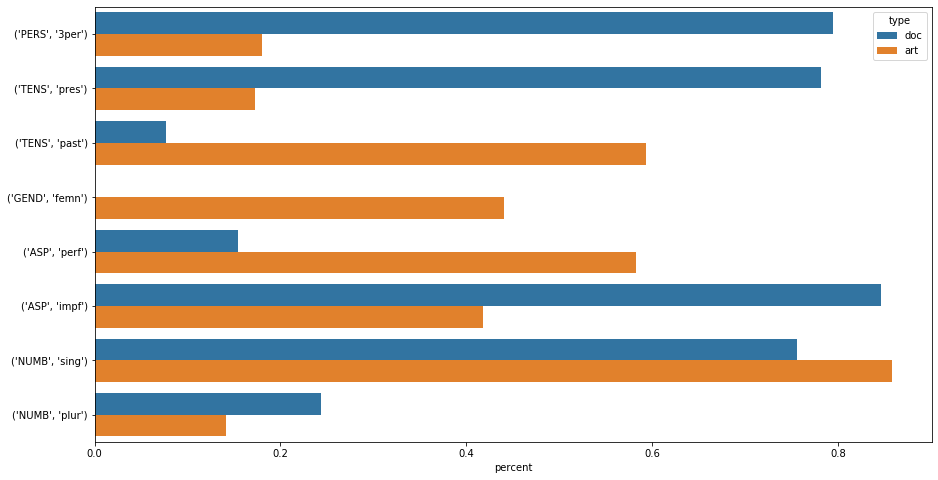

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(x=s_['percent'], y=s_.index, hue=s_['type'])

## лексические

### количество уникальных лемм

In [46]:
def get_n_uniq_lemmes(txt):
    return len(set([morph.normal_forms(x)[0] for x in re.findall(r'\w+', txt)]))

In [47]:
get_n_uniq_lemmes(how_to_buis_txt), get_n_uniq_lemmes(alice_txt_by_chapter[1])

(606, 633)

### число уникальных лемм разных частей речи (существительных, глаголов и др.)

In [48]:
def get_n_uniq_lemmes_by_pos(txt):
    lem_sets = {k:set() for k in list(morph.parse('')[0].tag.PARTS_OF_SPEECH)+['None']}
    for w in re.findall(r'\w+', txt):
        p = morph.parse(w)[0]
        pos = p.tag.POS if p.tag.POS is not None else 'None'
        lem_sets[pos].add(p.normal_form)
    ns = {k:len(v) for k,v in lem_sets.items()}
    return ns

In [49]:
pd.Series(get_n_uniq_lemmes_by_pos(alice_txt_by_chapter[1])).sort_values(ascending=False)

NOUN    178
VERB    154
ADVB     83
ADJF     58
INFN     40
CONJ     28
PRCL     18
PREP     16
ADJS     14
NPRO     13
GRND     10
NUMR      9
None      8
PRED      8
COMP      7
INTJ      4
PRTS      2
PRTF      2
dtype: int64

In [50]:
pd.Series(get_n_uniq_lemmes_by_pos(how_to_buis_txt)).sort_values(ascending=False)

NOUN    271
ADJF    107
VERB     62
ADVB     34
PRTF     26
INFN     25
CONJ     18
ADJS     16
PREP     15
None     14
PRTS     11
PRCL     11
NPRO      8
GRND      6
PRED      2
INTJ      2
NUMR      2
COMP      0
dtype: int64

### число незнакомых слов

In [51]:
def get_n_unknown_words(txt):
    return 1-np.mean([morph.word_is_known(w) for w in re.findall('\w+', txt)])

In [52]:
get_n_unknown_words(alice_txt_by_chapter[1])

0.013698630136986356

In [53]:
get_n_unknown_words(alice_txt_by_chapter[0])

0.002376708259061222

In [54]:
get_n_unknown_words(how_to_buis_txt)

0.07201800450112528

### самые частотные слова и их относительная частота

In [55]:
def get_freq_words(txt):
    freqs = {}
    for w in re.findall('\w+',txt):
        w = w.lower()
        freqs[w] = freqs.get(w,0)+1
    freqs = pd.Series(freqs).sort_values(ascending=False)
    freqs = freqs/freqs.sum()
    return freqs

In [56]:
s1 = get_freq_words(alice_txt_by_chapter[1])
s1[s1>0.005]

и          0.038605
она        0.028020
в          0.026775
я          0.020548
не         0.020548
алиса      0.018057
что        0.014944
а          0.012453
на         0.011831
мышь       0.008717
как        0.008717
это        0.008717
так        0.008095
с          0.007472
все        0.007472
у          0.006849
мне        0.006849
сказала    0.006227
то         0.006227
нее        0.005604
если       0.005604
от         0.005604
за         0.005604
была       0.005604
dtype: float64

In [57]:
s2 = get_freq_words(how_to_buis_txt)
s2[s2>0.005]

и               0.045761
в               0.030758
с               0.013503
а               0.011253
при             0.011253
языка           0.010503
документации    0.009002
не              0.008252
что             0.007502
по              0.007502
на              0.007502
но              0.006752
этом            0.006002
рода            0.006002
речи            0.006002
как             0.006002
к               0.006002
о               0.005251
их              0.005251
стилистика      0.005251
или             0.005251
dtype: float64

In [58]:
d1 = {}
for w,v in s1.iteritems():
    d1[len(w)] = d1.get(len(w),0)+v
d1 = pd.Series(d1)

In [59]:
d2 = {}
for w,v in s2.iteritems():
    d2[len(w)] = d2.get(len(w),0)+v
d2 = pd.Series(d2)

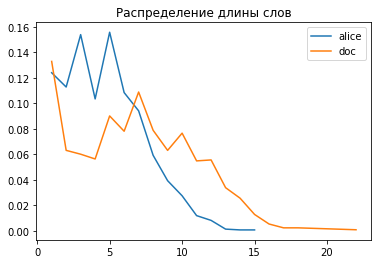

In [60]:
sns.lineplot(d1.index, d1.values, label='alice')
sns.lineplot(d2.index, d2.values, label='doc')
plt.legend()
plt.title('Распределение длины слов')
plt.show()

### самые частотные слова основных частей речи (существительные, прилагательные, наречия, глаголы)

In [61]:
s1 = get_freq_words(alice_txt_by_chapter[1]).to_frame()
s1.columns = ['freq']
s1.index.name = 'word'
s1['POS'] = [str(morph.parse(w)[0].tag.POS)  for w in s1.index]
d = s1.groupby('POS')['freq'].sum().to_dict()
s1['freq_POS_sum'] = s1['POS'].apply(lambda w: d[w])
s1['freq_POS'] = s1['freq']/s1['freq_POS_sum']

s1 = s1[s1['POS'].isin(['NOUN','ADJF','ADVB','VERB'])]

cds1 = pd.concat([s1[s1['POS']==v][['freq_POS']].reset_index().sort_values(by='freq_POS', ascending=False).rename(columns={'word':'word__'+v,'freq_POS':'freq_POS__'+v})
                 for v in ['NOUN','ADJF','ADVB','VERB']],1)

cds1[(cds1[[f for f in cds1.columns if 'freq' in f]]>0.025).any(1)]

,word__NOUN,freq_POS__NOUN,word__ADJF,freq_POS__ADJF,word__ADVB,freq_POS__ADVB,word__VERB,freq_POS__VERB
0,алиса,0.088685,все,0.087591,теперь,0.056338,сказала,0.038314
1,мышь,0.042813,какой,0.029197,тут,0.049296,была,0.034483
2,нее,0.027523,такая,0.029197,совсем,0.049296,подумала,0.030651
3,случае,0.015291,таком,0.021898,здесь,0.028169,будет,0.026820
4,кошек,0.015291,бедная,0.021898,всего,0.028169,было,0.022989
5,слова,0.012232,всех,0.021898,сегодня,0.028169,простите,0.015326
6,мейбл,0.012232,всяком,0.021898,опять,0.028169,может,0.011494


In [62]:
s1 = get_freq_words(how_to_buis_txt).to_frame()
s1.columns = ['freq']
s1.index.name = 'word'
s1['POS'] = [str(morph.parse(w)[0].tag.POS)  for w in s1.index]
d = s1.groupby('POS')['freq'].sum().to_dict()
s1['freq_POS_sum'] = s1['POS'].apply(lambda w: d[w])
s1['freq_POS'] = s1['freq']/s1['freq_POS_sum']

s1 = s1[s1['POS'].isin(['NOUN','ADJF','ADVB','VERB'])]

cds2 = pd.concat([s1[s1['POS']==v][['freq_POS']].reset_index().sort_values(by='freq_POS', ascending=False).rename(columns={'word':'word__'+v,'freq_POS':'freq_POS__'+v})
                 for v in ['NOUN','ADJF','ADVB','VERB']],1)

cds2[(cds2[[f for f in cds2.columns if 'freq' in f]]>0.025).any(1)]

,word__NOUN,freq_POS__NOUN,word__ADJF,freq_POS__ADJF,word__ADVB,freq_POS__ADVB,word__VERB,freq_POS__VERB
0,языка,0.026168,информационной,0.026316,всегда,0.095238,является,0.051282
1,документации,0.022430,деловая,0.026316,полезно,0.047619,может,0.038462
2,рода,0.014953,языковых,0.026316,часто,0.047619,рассматривается,0.025641
3,речи,0.014953,деловой,0.021930,несколько,0.047619,предполагает,0.025641
4,стилистика,0.013084,разного,0.021930,всего,0.047619,считается,0.025641
5,понятие,0.011215,русского,0.017544,правильно,0.047619,будет,0.025641
6,текста,0.009346,деловых,0.017544,лишенно,0.023810,существует,0.025641
7,стилистики,0.009346,разных,0.013158,однозначно,0.023810,объясняется,0.025641
8,проза,0.009346,таким,0.013158,точно,0.023810,используются,0.025641


In [63]:
for v in  ['NOUN','ADJF','ADVB','VERB']:
    cds1[f'word__{v}__len'] = [len(w) if w is not np.nan else None for w in cds1[f'word__{v}']]
    cds2[f'word__{v}__len'] = [len(w) if w is not np.nan else None for w in cds2[f'word__{v}']]

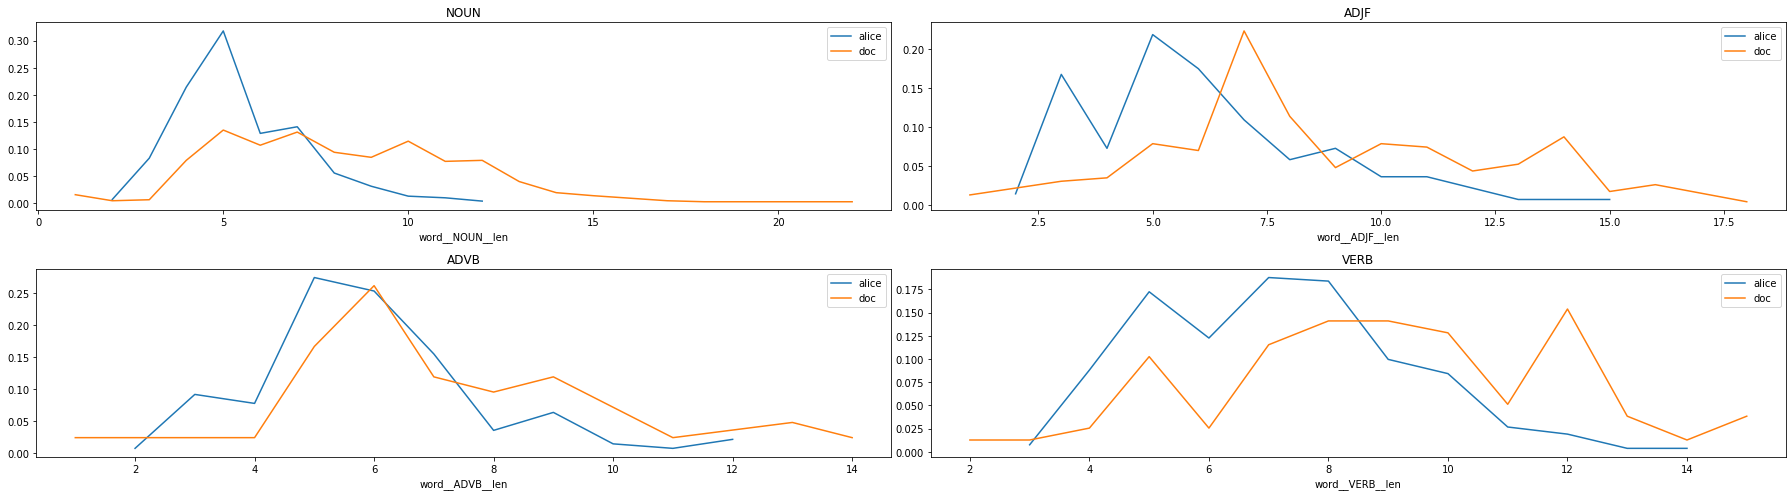

In [64]:
plt.figure(figsize=(25,7))
for idx, v in enumerate( ['NOUN','ADJF','ADVB','VERB']):
    plt.subplot(2,2,idx+1)
    s = cds1.groupby(f'word__{v}__len')[f'freq_POS__{v}'].sum()
    sns.lineplot(x=s.index, y=s.values, label='alice')
    s = cds2.groupby(f'word__{v}__len')[f'freq_POS__{v}'].sum()
    sns.lineplot(x=s.index, y=s.values, label='doc')
    plt.title(v)
plt.legend()
plt.tight_layout()
plt.show()

### коэффициент лексического богатства текста
отношение числа различных лемм к общему числу словоупотреблений

In [65]:
get_n_uniq_lemmes(alice_txt_by_chapter[1])/get_n_wordsamples(alice_txt_by_chapter[1])

0.3941469489414695

In [66]:
get_n_uniq_lemmes(alice_txt_by_chapter[0])/get_n_wordsamples(alice_txt_by_chapter[0])

0.3879976232917409

In [67]:
get_n_uniq_lemmes(how_to_buis_txt)/get_n_wordsamples(how_to_buis_txt)

0.45461365341335336

# Анализ данных